# Project FIFA Money Ball

## Objectives

- Rank players by market value.

- Highlight the top players for their outstanding performances over a discrete season.

- Implement machine learning model : create the best prediction of the market value of the payers

In [1]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('fifa21_male2.csv')

df.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


Cleaning the dataframe

In [4]:
# I pass ID as the index
df = df.set_index('ID')

In [5]:
# first I like to standardize the columns

df.columns = df.columns.str.replace(' ', '_').str.lower()

In [6]:
# rename the columns 

df.rename(columns={'ova': 'overall',
                   'pot' : 'potential',
                   'bov' : 'best_overall',
                   'bp' : 'best_position',
                   'w/f' : 'weak_foot',
                   'a/w': 'attacking_work_rate',
                   'sm':'skill-move',
                   'd/w': 'defensive_work_rate',
                   'ir' : 'international_reputation'},inplace=True)
df.head()

name  age  overall            nationality           club  \
ID                                                                    
2   G. Pasquale   33       69                  Italy        Udinese   
16  Luis García   37       71                  Spain      KAS Eupen   
27      J. Cole   33       71                England  Coventry City   
36     D. Yorke   36       68  Trinidad &amp; Tobago     Sunderland   
41      Iniesta   36       81                  Spain    Vissel Kobe   

    best_overall best_position      position  \
ID                                             
2             71           LWB            LM   
16            70            CM    CM CAM CDM   
27            71           CAM  CAM RM RW LM   
36            70            ST           NaN   
41            82           CAM        CM CAM   

                                         player_photo  \
ID                                                      
2   https://cdn.sofifa.com/players/000/002/16_120.png   
16  https://cdn.sofifa.com/players/000/016/19_120.png   
27  https://cdn.sofifa.com/players/000/027/16_120.png   
36  https://cdn.sofifa.com/players/000/036/09_120.png   
41  https://cdn.sofifa.com/players/000/041/20_120.png   

                                           club_logo  \
ID                                                     
2       https://cdn.sofifa.com/teams/55/light_60.png   
16    https://cdn.sofifa.com/teams/2013/light_60.png   
27    https://cdn.sofifa.com/teams/1800/light_60.png   
36     https://cdn.sofifa.com/teams/106/light_60.png   
41  https://cdn.sofifa.com/teams/101146/light_60.png   

                                 flag_photo  potential  \
ID                                                       
2       https://cdn.sofifa.com/flags/it.png         69   
16      https://cdn.sofifa.com/flags/es.png         71   
27  https://cdn.sofifa.com/flags/gb-eng.png         71   
36      https://cdn.sofifa.com/flags/tt.png         82   
41      https://cdn.sofifa.com/flags/es.png         81   

              team_&_contract height  weight   foot  growth        joined  \
ID                                                                          
2         Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   Jul 1, 2008   
16      KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0  Jul 19, 2014   
27  Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   Jan 7, 2016   
36            Sunderland 2009  5'11"  165lbs  Right      14           NaN   
41    Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0  Jul 16, 2018   

   loan_date_end  value  wage release_clause     contract  attacking  \
ID                                                                     
2            NaN  €625K   €7K             €0  2008 ~ 2016        313   
16           NaN  €600K   €7K          €1.1M  2014 ~ 2019        337   
27           NaN  €1.1M  €15K             €0  2016 ~ 2020        337   
36           NaN     €0    €0             €0         2009        264   
41           NaN  €5.5M  €12K          €7.2M  2018 ~ 2021        367   

    crossing  finishing  heading_accuracy  short_passing  volleys  skill  \
ID                                                                         
2         75         50                59             71     58.0    338   
16        68         64                61             76     68.0    369   
27        80         64                41             77     75.0    387   
36        54         70                60             80      NaN    255   
41        75         69                54             90     79.0    408   

    dribbling  curve  fk_accuracy  long_passing  ball_control  movement  \
ID                                                                        
2          73   65.0           60            69            71       347   
16         69   79.0           79            71            71       305   
27         79   84.0           77            69            78       295   
36         68    NaN   

In [7]:
df['gender'].value_counts()

Male    17125
Name: gender, dtype: int64

In [8]:
# drop the irrelevant columns 

# These columns are irrelevant because the data are useless for our analysis like player_photo, club_logo or flag_photo.
# Gender is irrelevant because all players are male
# I have dropped the other columns because we need to determine the value market of the players no matter their positions.
# they would be kept to compare the players position by position.

df = df.drop(['player_photo','club_logo','flag_photo','team_&_contract', 'ls','st','rs','lw','lf','cf','rf', 'rw','lam', 'cam', 'ram','lwb', 'ldm', 'cdm','rdm','lm','lcm', 'cm', 'rcm','rm','rwb','lb', 'lcb', 'cb','rcb','rb','gk','gender'], axis=1)


In [9]:
#Cleaning height columns

df= df[~df["height"].str.contains("~")]

df= df[df["height"].str.contains("'")]

In [10]:
#Converting Height column to cm

df["height"] = df["height"].str[:-1]

def parse_height(height):
    # format: 5'11"
    height = height.split("'")
    feet = float(height[0])
    inch = float(height[1])
    return ((feet*30.48) + (inch*2.54))

df["height"]=round(df["height"].apply(lambda x:parse_height(x)),0)

In [11]:
df["height"]

ID
2         183.0
16        178.0
27        175.0
36        180.0
41        170.0
          ...  
259088    198.0
259090    178.0
259091    175.0
259101    175.0
259105    178.0
Name: height, Length: 17125, dtype: float64

In [12]:
#Converting Weight column to kg
df["weight"] = round(df["weight"].str.split("lbs").str[0].astype(float)*0.45359237,0)

In [13]:
#Cleaning categorical columns 
df["international_reputation"]=df["international_reputation"].str[:-1]
df["weak_foot"]=df["weak_foot"].str[:-1]
df["skill-move"]=df["skill-move"].str[:-1]


# converting int to float
df['international_reputation'] = df['international_reputation'].astype(float)

In [14]:
#Cleaning to Value column and convert to decimal
df["value"] = df["value"].str.replace("€","")
df["value"] = df["value"].str.replace("M","")
df.loc[df["value"].str.contains("K"),"value"]=df["value"].str.split("K").str[0].astype(float)/1000
df["value"] = round(df["value"].astype(float),2)
df["value"]


ID
2         0.62
16        0.60
27        1.10
36        0.00
41        5.50
          ... 
259088    0.55
259090    0.13
259091    0.13
259101    0.48
259105    0.32
Name: value, Length: 17125, dtype: float64

In [15]:
#Cleaning Wage column and convert to decimal
df["wage"] = df["wage"].str.replace("€","")
df.loc[df["wage"].str.contains("K"),"wage"]=df["wage"].str.split("K").str[0].astype(float)*1000
df["wage"] = round(df["wage"].astype(float)/1000000,5)

In [16]:
df["wage"]

ID
2         0.007
16        0.007
27        0.015
36        0.000
41        0.012
          ...  
259088    0.002
259090    0.003
259091    0.002
259101    0.003
259105    0.002
Name: wage, Length: 17125, dtype: float64

In [17]:
#Checking Height,Weight,Value,Wage columns
df.head(10)

name  age  overall            nationality               club  \
ID                                                                           
2      G. Pasquale   33       69                  Italy            Udinese   
16     Luis García   37       71                  Spain          KAS Eupen   
27         J. Cole   33       71                England      Coventry City   
36        D. Yorke   36       68  Trinidad &amp; Tobago         Sunderland   
41         Iniesta   36       81                  Spain        Vissel Kobe   
61      D. Odonkor   27       66                Germany   Alemannia Aachen   
80    E. Belözoğlu   38       77                 Turkey      Fenerbahçe SK   
241       R. Giggs   39       78                  Wales  Manchester United   
244  G. Neville  B   35       76                England  Manchester United   
246     P. Scholes   37       80                England  Manchester United   

     best_overall best_position      position  potential  height  weight  \
ID                                                                         
2              71           LWB            LM         69   183.0    82.0   
16             70            CM    CM CAM CDM         71   178.0    65.0   
27             71           CAM  CAM RM RW LM         71   175.0    73.0   
36             70            ST           NaN         82   180.0    75.0   
41             82           CAM        CM CAM         81   170.0    68.0   
61             66            RW         RW RM         70   173.0    74.0   
80             77            CM        CM CDM         77   170.0    72.0   
241            78           CAM     LM CM CAM         78   178.0    71.0   
244            78            CB     RB CB RWB         82   178.0    79.0   
246            82           CAM        CM CDM         80   170.0    71.0   

      foot  growth        joined loan_date_end  value   wage release_clause  \
ID                                                                            
2     Left       0   Jul 1, 2008           NaN   0.62  0.007             €0   
16   Right       0  Jul 19, 2014           NaN   0.60  0.007          €1.1M   
27   Right       0   Jan 7, 2016           NaN   1.10  0.015             €0   
36   Right      14           NaN           NaN   0.00  0.000             €0   
41   Right       0  Jul 16, 2018           NaN   5.50  0.012          €7.2M   
61   Right       4   Jan 1, 2011           NaN   0.72  0.005             €0   
80    Left       0   Jul 2, 2019           NaN   2.80  0.044          €5.3M   
241   Left       0   Dec 1, 1990           NaN   0.00  0.060             €0   
244  Right       6   Jan 1, 1991           NaN   0.00  0.000             €0   
246  Right       0   Jul 8, 1993           NaN   0.40  0.040             €0   

        contract  attacking  crossing  finishing  heading_accuracy  \
ID                                                                   
2    2008 ~ 2016        313        75         50                59   
16   2014 ~ 2019        337        68         64                61   
27   2016 ~ 2020        337        80         64                41   
36          2009        264        54         70                60   
41   2018 ~ 2021        367        75         69                54   
61   2011 ~ 2012        271        61         53                42   
80   2019 ~ 2020        342        80         66                43   
241  1990 ~ 2014        380        90         70                60   
244  1991 ~ 2011        304        72         31                75   
246  1993 ~ 2013        394        83         65                72   

     short_passing  volleys  skill  dribbling  curve  fk_accuracy  \
ID                                                                  
2               71     58.0    338         73   65.0           60   
16              76     68.0    369         69   79.0           79   
27              77     75.0    387         79   84.0           77   
36              80      NaN  

In [18]:
#Checking null values
df.isnull().any()


name           False
age            False
overall        False
nationality    False
club            True
               ...  
pas            False
dri            False
def            False
phy            False
hits           False
Length: 74, dtype: bool

In [19]:
# dealing with the missing numerical values 

# obtaining information on numerical datas

df.describe().T

count         mean         std    min       25%  \
age                       17125.0    25.272934    4.942665   16.0    21.000   
overall                   17125.0    66.965022    6.864329   38.0    62.000   
best_overall              17125.0    67.900204    6.637538   42.0    64.000   
potential                 17125.0    72.489810    5.769949   47.0    69.000   
height                    17125.0   181.148672    6.846506  155.0   175.000   
weight                    17125.0    75.142131    7.178303   50.0    70.000   
growth                    17125.0     5.524788    5.787539   -1.0     0.000   
value                     17125.0     2.567281    5.372658    0.0     0.380   
wage                      17125.0     0.010533    0.021145    0.0     0.001   
attacking                 17125.0   258.537752   72.255687   33.0   232.000   
crossing                  17125.0    51.621314   17.875715    6.0    41.000   
finishing                 17125.0    47.956672   19.391547    3.0    33.000   
heading_accuracy          17125.0    53.598832   16.947164    5.0    46.000   
short_passing             17125.0    60.507620   13.960635    7.0    56.000   
volleys                   17067.0    45.005742   17.729483    4.0    32.000   
skill                     17125.0   266.607591   76.809344   43.0   232.000   
dribbling                 17125.0    57.846423   18.047250    5.0    53.000   
curve                     17067.0    49.574676   18.188344    4.0    37.000   
fk_accuracy               17125.0    44.387270   17.504128    5.0    32.000   
long_passing              17125.0    54.324321   14.856911    9.0    45.000   
ball_control              17125.0    60.642803   15.873647    5.0    57.000   
movement                  17125.0   322.693664   54.933593  113.0   294.000   
acceleration              17125.0    65.445898   14.657889   12.0    58.000   
sprint_speed              17125.0    65.443036   14.437377   11.0    59.000   
agility                   17067.0    64.602273   14.372443   14.0    57.000   
reactions                 17125.0    62.924847    9.037279   24.0    57.000   
balance                   17067.0    64.715591   14.031563   17.0    57.000   
power                     17125.0   302.414774   49.380576  128.0   272.000   
shot_power                17125.0    59.711416   13.417931   12.0    50.000   
jumping                   17067.0    65.170212   11.918063   22.0    58.000   
stamina                   17125.0    63.309606   15.313272   11.0    56.000   
strength                  17125.0    65.308555   12.627212   16.0    58.000   
long_shots                17125.0    49.135708   19.044862    4.0    35.000   
mentality                 17125.0   261.922803   62.913935   50.0   235.000   
aggression                17125.0    56.997839   17.021619    9.0    45.000   
interceptions             17118.0    47.085582   20.846705    4.0    26.000   
positioning               17118.0    52.372766   19.094432    2.0    43.000   
vision                    17067.0    55.443605   13.730080   10.0    47.000   
penalties                 17125.0    50.251445   15.696363    7.0    40.000   
composure                 16702.0    59.940965   11.751111   12.0    53.000   
defending                 17125.0   141.469898   61.595180   17.0    84.000   
marking                   17125.0    47.246949   20.182548    3.0    29.000   
standing_tackle           17125.0    48.279358   21.483597    5.0    28.000   
sliding_tackle            17067.0    46.099725   21.185154    6.0    25.000   
goalkeeping               17125.0    77.609693   81.136603    5.0    48.000   
gk_diving                 17125.0    15.600467   16.828637    1.0     8.000   
gk_handling               17125.0    15.484672   16.143679    1.0     8.000   
gk_kicking                17125.0    15.472058   15.997328    1.0     8.000   
gk_positioning            17125.0    15.514277   16.406064    1.0     8.000   
gk_reflexes               17125.0    15.738628   17.130908    1.0     8.000   

In [20]:
# replacing the missing values by the mean

df['curve'] = df['curve'].fillna((df['curve'].mean()))
df['agility'] = df['agility'].fillna((df['agility'].mean()))
df['balance'] = df['balance'].fillna((df['balance'].mean()))
df['jumping'] = df['jumping'].fillna((df['jumping'].mean()))
df['positioning'] = df['positioning'].fillna((df['positioning'].mean()))
df['vision'] = df['vision'].fillna((df['vision'].mean()))
df['sliding_tackle'] = df['sliding_tackle'].fillna((df['sliding_tackle'].mean())) 

In [21]:
# Removing duplicates
df = df.drop_duplicates() 

In [22]:
# checking the final dataframe 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17125 entries, 2 to 259105
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17125 non-null  object 
 1   age                       17125 non-null  int64  
 2   overall                   17125 non-null  int64  
 3   nationality               17125 non-null  object 
 4   club                      17102 non-null  object 
 5   best_overall              17125 non-null  int64  
 6   best_position             17125 non-null  object 
 7   position                  16712 non-null  object 
 8   potential                 17125 non-null  int64  
 9   height                    17125 non-null  float64
 10  weight                    17125 non-null  float64
 11  foot                      17125 non-null  object 
 12  growth                    17125 non-null  int64  
 13  joined                    17067 non-null  object 
 14  loan_

In [23]:
# save the data frame to a csv file

df.to_csv('Project_Money_Ball.csv')

Exploration of the datas and answer the questions

## Rank players by market value

In [24]:
df['market_value_rank'] = df['value'].rank(ascending = False)
df.sort_values(by='market_value_rank', ascending = True)


name  age  overall       nationality                 club  \
ID                                                                            
231747       K. Mbappé   21       90            France  Paris Saint-Germain   
190871       Neymar Jr   28       91            Brazil  Paris Saint-Germain   
192985    K. De Bruyne   29       91           Belgium      Manchester City   
188545  R. Lewandowski   31       91            Poland    FC Bayern München   
208722         S. Mané   28       90           Senegal            Liverpool   
...                ...  ...      ...               ...                  ...   
201059     T. Guerabis   18       53            France           AC Ajaccio   
110082           Pinto   37       72             Spain         FC Barcelona   
109852      G. McAuley   39       70  Northern Ireland     Northern Ireland   
201346        L. Boyce   29       66  Northern Ireland     Northern Ireland   
188610        D. Penny   33       66              Peru                 Peru   

        best_overall best_position  position  potential  height  weight  \
ID                                                                        
231747            91            ST  ST LW RW         95   178.0    73.0   
190871            91            LW    LW CAM         91   175.0    68.0   
192985            91           CAM    CAM CM         91   180.0    70.0   
188545            91            ST        ST         91   183.0    80.0   
208722            90            LW        LW         90   175.0    69.0   
...              ...           ...       ...        ...     ...     ...   
201059            54            ST    CF CAM         62   178.0    71.0   
110082            72            GK       NaN         72   185.0    82.0   
109852            69            CB        CB         70   190.0    89.0   
201346            66            ST        ST         66   183.0    75.0   
188610            65            GK        GK         66   198.0    86.0   

         foot  growth        joined loan_date_end  value   wage  \
ID                                                                
231747  Right       5   Jul 1, 2018           NaN  105.5  0.160   
190871  Right       0   Aug 3, 2017           NaN   90.0  0.270   
192985  Right       0  Aug 30, 2015           NaN   87.0  0.370   
188545  Right       0   Jul 1, 2014           NaN   80.0  0.240   
208722  Right       0   Jul 1, 2016           NaN   78.0  0.250   
...       ...     ...           ...           ...    ...    ...   
201059  Right       9   Jan 1, 2005           NaN    0.0  0.000   
110082  Right       0   Jul 1, 2008           NaN    0.0  0.025   
109852  Right       0   Jun 1, 2019           NaN    0.0  0.000   
201346  Right       0  Jan 25, 2020           NaN    0.0  0.000   
188610  Right       0   Jan 1, 2013           NaN    0.0  0.000   

       release_clause     contract  attacking  crossing  finishing  \
ID                                                                   
231747        €203.1M  2018 ~ 2022        408        78         91   
190871        €166.5M  2017 ~ 2022        408        85         87   
192985          €161M  2015 ~ 2023        407        94         82   
188545          €132M  2014 ~ 2023        423        71         94   
208722        €144.3M  2016 ~ 2023        410        76         90   
...               ...          ...        ...       ...        ...   
201059             €0  2005 ~ 2012        233        31         58   
110082             €0  2008 ~ 2017        129        25         25   
109852             €0         Free        249        49         47   
201346             €0         Free        295        43         68   
188610             €0         Free         78        15         12   

        heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
ID                                                                          
231747                73             83     83.0    394         92   79.0   


In [25]:
# Top 5 at a glance

df.nlargest(5,columns="value")[["name","age","club","value"]]

name  age                 club  value
ID                                                     
231747       K. Mbappé   21  Paris Saint-Germain  105.5
190871       Neymar Jr   28  Paris Saint-Germain   90.0
192985    K. De Bruyne   29      Manchester City   87.0
188545  R. Lewandowski   31    FC Bayern München   80.0
208722         S. Mané   28            Liverpool   78.0

## Highlight the top players for their outstanding performances over a discrete season.

In [26]:
#Top 5 Rating Player
df.nlargest(5,columns="overall")[["name","age","club","overall","best_position"]]

name  age                 club  overall best_position
ID                                                                        
158023           L. Messi   33         FC Barcelona       93            RW
20801   Cristiano Ronaldo   35             Juventus       92            ST
188545     R. Lewandowski   31    FC Bayern München       91            ST
190871          Neymar Jr   28  Paris Saint-Germain       91            LW
192985       K. De Bruyne   29      Manchester City       91           CAM

In [27]:
# overall mean for each best_position

pd.DataFrame(df.groupby("best_position").overall.mean().sort_values(ascending=False))



overall
best_position           
CF             72.977528
CM             68.545455
LW             68.531100
CDM            68.444623
RW             68.310030
RWB            67.785714
RB             67.694631
LWB            67.325397
LB             66.921824
CAM            66.803651
LM             66.777640
CB             66.730012
GK             66.616117
ST             66.220677
RM             65.671652

Exploring the data

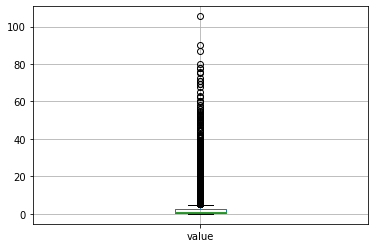

In [28]:
df[['value']].boxplot()   
# save the figure
plt.savefig('value.png', dpi=100, bbox_inches='tight')
plt.show()

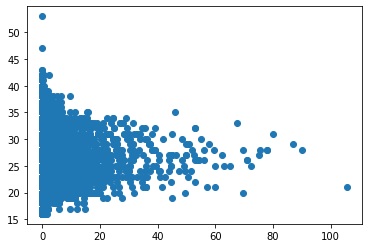

In [31]:
plt.scatter(df['value'], df['age'])

# save the figure
plt.savefig('value_age.png', dpi=100, bbox_inches='tight')

plt.show()

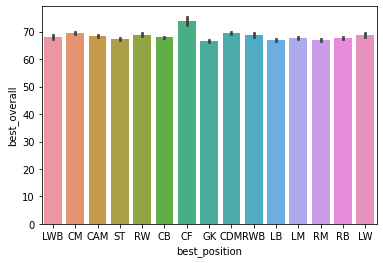

In [32]:
sns.barplot(x="best_position", y="best_overall", data=df)
# save the figure
plt.savefig('best_position_best_overall.png', dpi=100, bbox_inches='tight')
plt.show()

In [33]:
#View the correlations
corr_mat = df.corr()
corr_mat

age   overall  best_overall  potential  \
age                       1.000000  0.517099      0.456734  -0.237619   
overall                   0.517099  1.000000      0.985877   0.592268   
best_overall              0.456734  0.985877      1.000000   0.628323   
potential                -0.237619  0.592268      0.628323   1.000000   
height                    0.093474  0.027299      0.016111  -0.021286   
weight                    0.258042  0.151095      0.131828  -0.039919   
growth                   -0.850204 -0.595585     -0.542890   0.294499   
value                     0.095993  0.631685      0.640823   0.563565   
wage                      0.200851  0.592925      0.592453   0.462235   
attacking                 0.183954  0.431238      0.464329   0.233866   
crossing                  0.151022  0.386334      0.400046   0.210944   
finishing                 0.105311  0.304012      0.336488   0.173281   
heading_accuracy          0.172793  0.305553      0.335677   0.137199   
short_passing             0.176786  0.492372      0.533046   0.318544   
volleys                   0.187794  0.362712      0.388301   0.177787   
skill                     0.168876  0.441689      0.473888   0.265503   
dribbling                 0.039607  0.350249      0.388163   0.264651   
curve                     0.180267  0.397320      0.417342   0.220134   
fk_accuracy               0.223884  0.369278      0.387289   0.166233   
long_passing              0.223088  0.482655      0.515422   0.283647   
ball_control              0.121097  0.431284      0.471454   0.292414   
movement                 -0.055642  0.302267      0.335011   0.258243   
acceleration             -0.186610  0.143928      0.179547   0.197884   
sprint_speed             -0.180717  0.153476      0.189491   0.197396   
agility                  -0.041315  0.226127      0.254781   0.189332   
reactions                 0.501010  0.870084      0.870157   0.471139   
balance                  -0.085504  0.100438      0.127728   0.131481   
power                     0.310459  0.546417      0.572275   0.221586   
shot_power                0.304947  0.534829      0.550932   0.266902   
jumping                   0.196550  0.258627      0.262992   0.075942   
stamina                   0.069741  0.335108      0.368788   0.170122   
strength                  0.350439  0.338347      0.335436   0.030991   
long_shots                0.190803  0.390849      0.419660   0.191780   
mentality                 0.272976  0.495097      0.523526   0.243646   
aggression                0.276063  0.382813      0.400031   0.139444   
interceptions             0.192996  0.305286      0.320034   0.143810   
positioning               0.122510  0.339672      0.368071   0.191910   
vision                    0.235359  0.505168      0.527542   0.304512   
penalties                 0.198917  0.317666      0.340311   0.147044   
composure                 0.421126  0.706141      0.721989   0.369826   
defending                 0.114796  0.248247      0.267770   0.138748   
marking                   0.155497  0.290071      0.309674   0.147320   
standing_tackle           0.106178  0.237478      0.257583   0.138787   
sliding_tackle            0.085663  0.208920      0.227278   0.128934   
goalkeeping               0.125933  0.038222     -0.008702  -0.007277   
gk_diving                 0.120891  0.037851     -0.008851  -0.005874   
gk_handling               0.125251  0.037993     -0.008312  -0.005240   
gk_kicking                0.130810  0.038650     -0.006124  -0.002734   
gk_positioning            0.134369  0.044653     -0.000933  -0.004015   
gk_reflexes               0.121822  0.037284     -0.008819  -0.005215   
total_stats               0.280383  0.607676      0.635037   0.329178   
base_stats                0.414897  0.832618      0.830127   0.474763   
international_reputation  0.403141  0.474492      0.455974   0.293444   
pac                      -0.177291  0.201319      0.212889   0.259294   
sho             

In [34]:
#Correlation With Value (most correlated with positive)
pd.DataFrame(corr_mat["value"]).sort_values("value", ascending=False).head(30)

value
value                     1.000000
wage                      0.822730
best_overall              0.640823
overall                   0.631685
potential                 0.563565
reactions                 0.559103
base_stats                0.526853
international_reputation  0.459635
composure                 0.447494
pas                       0.444491
dri                       0.442164
total_stats               0.393049
vision                    0.361423
shot_power                0.334651
power                     0.329976
short_passing             0.327685
sho                       0.323777
long_passing              0.306747
mentality                 0.306262
skill                     0.300472
ball_control              0.294170
attacking                 0.289888
curve                     0.274431
phy                       0.266548
movement                  0.263766
dribbling                 0.260363
long_shots                0.256573
volleys                   0.255454
crossing                  0.249099
positioning               0.245056

## B. Implementing linear regression model

1. I will do it without any transformation of the datas
2. I will preprocess the metrics to check if the model can be improved. I chose a boxcox transformation.
3. I will run the model on a reduced dataframe - before scaling (a) and after scaling (b)

### 1. Applying the linear regression model

 - final cleaning of the datas
 - collecting information on the datas
 - running the model
 - analysing the results

In [35]:
#  I decide to include the position of the players to the metrics. decision based on domain knowledge
# I apply get_dummies to have numerical values of the best position of players.

df = pd.get_dummies(df,columns=['best_position'],drop_first=True)

In [36]:
df_num = df.select_dtypes('number')

In [37]:
df_num= df_num.drop(['market_value_rank'], axis = 1)

In [38]:
df_num = df_num.fillna(0)

In [39]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17125 entries, 2 to 259105
Data columns (total 73 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       17125 non-null  int64  
 1   overall                   17125 non-null  int64  
 2   best_overall              17125 non-null  int64  
 3   potential                 17125 non-null  int64  
 4   height                    17125 non-null  float64
 5   weight                    17125 non-null  float64
 6   growth                    17125 non-null  int64  
 7   value                     17125 non-null  float64
 8   wage                      17125 non-null  float64
 9   attacking                 17125 non-null  int64  
 10  crossing                  17125 non-null  int64  
 11  finishing                 17125 non-null  int64  
 12  heading_accuracy          17125 non-null  int64  
 13  short_passing             17125 non-null  int64  
 14  volle

In [40]:
df_num.describe().T

count        mean       std    min    25%    50%    75%  \
age                17125.0   25.272934  4.942665   16.0   21.0   25.0   29.0   
overall            17125.0   66.965022  6.864329   38.0   62.0   67.0   72.0   
best_overall       17125.0   67.900204  6.637538   42.0   64.0   68.0   72.0   
potential          17125.0   72.489810  5.769949   47.0   69.0   72.0   76.0   
height             17125.0  181.148672  6.846506  155.0  175.0  180.0  185.0   
...                    ...         ...       ...    ...    ...    ...    ...   
best_position_RB   17125.0    0.052204  0.222445    0.0    0.0    0.0    0.0   
best_position_RM   17125.0    0.081985  0.274350    0.0    0.0    0.0    0.0   
best_position_RW   17125.0    0.019212  0.137272    0.0    0.0    0.0    0.0   
best_position_RWB  17125.0    0.014715  0.120414    0.0    0.0    0.0    0.0   
best_position_ST   17125.0    0.155328  0.362228    0.0    0.0    0.0    0.0   

                     max  
age                 53.0  
overall             93.0  
best_overall        93.0  
potential           95.0  
height             206.0  
...                  ...  
best_position_RB     1.0  
best_position_RM     1.0  
best_position_RW     1.0  
best_position_RWB    1.0  
best_position_ST     1.0  

[73 rows x 8 columns]

In [41]:
# copying the dataframe to apply pre processing on a second run of linear regression

dfLR = df_num.copy()


In [42]:
#View the correlations
corr_mat = dfLR.corr()
corr_mat

age   overall  best_overall  potential    height  \
age                1.000000  0.517099      0.456734  -0.237619  0.093474   
overall            0.517099  1.000000      0.985877   0.592268  0.027299   
best_overall       0.456734  0.985877      1.000000   0.628323  0.016111   
potential         -0.237619  0.592268      0.628323   1.000000 -0.021286   
height             0.093474  0.027299      0.016111  -0.021286  1.000000   
...                     ...       ...           ...        ...       ...   
best_position_RB   0.011738  0.024946     -0.005647  -0.000086 -0.098273   
best_position_RM  -0.085536 -0.056309     -0.045823  -0.015298 -0.210346   
best_position_RW   0.030658  0.027424      0.022229  -0.025964 -0.111591   
best_position_RWB -0.028924  0.014612      0.015281   0.022826 -0.067964   
best_position_ST  -0.006002 -0.046502     -0.038778  -0.055125  0.122836   

                     weight    growth     value      wage  attacking  \
age                0.258042 -0.850204  0.095993  0.200851   0.183954   
overall            0.151095 -0.595585  0.631685  0.592925   0.431238   
best_overall       0.131828 -0.542890  0.640823  0.592453   0.464329   
potential         -0.039919  0.294499  0.563565  0.462235   0.233866   
height             0.766261 -0.053598 -0.000646  0.020620  -0.354181   
...                     ...       ...       ...       ...        ...   
best_position_RB  -0.092639 -0.029673 -0.006738 -0.001503   0.019475   
best_position_RM  -0.194095  0.051534 -0.025486 -0.039036   0.103746   
best_position_RW  -0.094927 -0.058411  0.021000  0.032017   0.088115   
best_position_RWB -0.061130  0.005426  0.000045  0.000562   0.016313   
best_position_ST   0.138234  0.000197 -0.014456 -0.005957   0.250044   

                   crossing  finishing  heading_accuracy  short_passing  \
age                0.151022   0.105311          0.172793       0.176786   
overall            0.386334   0.304012          0.305553       0.492372   
best_overall       0.400046   0.336488          0.335677       0.533046   
potential          0.210944   0.173281          0.137199       0.318544   
height            -0.492988  -0.359035          0.060041      -0.352790   
...                     ...        ...               ...            ...   
best_position_RB   0.163788  -0.088787          0.050804       0.034924   
best_position_RM   0.177134   0.161379         -0.105125       0.060078   
best_position_RW   0.099301   0.123056         -0.018501       0.039858   
best_position_RWB  0.097138  -0.025337         -0.004233       0.038563   
best_position_ST  -0.080147   0.439745          0.300125      -0.030525   

                    volleys     skill  dribbling     curve  fk_accuracy  \
age                0.176261  0.168876   0.039607  0.180267     0.223884   
overall            0.352460  0.441689   0.350249  0.397320     0.369278   
best_overall       0.376928  0.473888   0.388163  0.417342     0.387289   
potential          0.167395  0.265503   0.264651  0.220134     0.166233   
height            -0.330277 -0.454918  -0.484774 -0.439257    -0.399204   
...                     ...       ...        ...       ...          ...   
best_position_RB  -0.064134  0.029814   0.064067  0.032390    -0.027944   
best_position_RM   0.119791  0.128364   0.166309  0.135531     0.103367   
best_position_RW   0.109691  0.085300   0.107078  0.094558     0.083133   
best_position_RWB -0.029791  0.031512   0.053683  0.033941    -0.012512   
best_position_ST   0.352812  0.032798   0.146856  0.071133     0.007652   

                   long_passing  ball_control  movement  acceleration  \
age                    0.223088      0.121097 -0.055642     -0.186610   
overall                0.482655      0.431284  0.302267      0.143928   
best_overall           0.515422      0.471454  0.335011      0.179547   
potential              0.283647      0.292414  0.258243      0.197884   
height                -0.315361     -0.411223 -0.632358     -0.550212   
...   

In [43]:
# splitting our data

X = dfLR.drop('value', axis=1)
y = dfLR['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
predictions = model.predict(X_test)

In [ ]:
# Analizing the results

In [46]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.7474318046699692, 1.4490970748041059, 2.631218232352827)

In [47]:
import math

results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true      pred     resid
ID                              
239018  1.00  1.373372  0.373372
244588  0.50  1.082356  0.582356
254756  0.92  2.245080  1.325080
230623  0.92  0.379765  0.540235
186148  3.60  5.788685  2.188685
...      ...       ...       ...
253581  0.90  0.624348  0.275652
210215  0.12 -1.602779  1.722779
234229  1.20  2.065266  0.865266
238936  0.85  1.446615  0.596615
217088  0.16 -3.324092  3.484092

[3425 rows x 3 columns]

In [48]:
results.describe()

true         pred        resid
count  3425.000000  3425.000000  3425.000000
mean      2.492531     2.450252     1.449097
std       5.236378     4.444320     2.196551
min       0.000000    -5.838957     0.000325
25%       0.350000     0.061130     0.419792
50%       0.780000     1.378010     0.896253
75%       2.200000     3.344853     1.677903
max      78.000000    53.756108    33.421550

### 2. Applying the linear regression model after standardization method to check if it can be improved

 - standardization 
 - running the model
 - analysing the results

In [49]:
dfLR1=df_num.copy()

In [50]:
from sklearn.preprocessing import StandardScaler

# using standard scaler
transformer = StandardScaler()
# proceding with the train-test split first or else your trainning set will carry information from your test set)


y = dfLR1['value']
X = dfLR1.drop(['value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [52]:

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [53]:
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized.shape
pd.DataFrame(x_standardized)

0         1         2         3         4         5         6   \
0      1.563385  0.296466  0.467024 -0.604843  0.270413  0.955389 -0.954629   
1      2.372689  0.587835  0.316361 -0.258209 -0.459908 -1.412928 -0.954629   
2      1.563385  0.587835  0.467024 -0.258209 -0.898101 -0.298426 -0.954629   
3      2.170363  0.150781  0.316361  1.648276 -0.167780 -0.019801  1.464432   
4      2.170363  2.044685  2.124313  1.474959 -1.628421 -0.994990 -0.954629   
...         ...       ...       ...       ...       ...       ...       ...   
17120 -0.662199 -0.431959 -0.286290 -0.604843  2.461375 -0.019801 -0.090678   
17121 -1.471503 -1.597438 -1.491591 -1.124793 -0.459908  0.258825  0.773272   
17122 -1.471503 -1.597438 -1.792917 -0.951476 -0.898101 -0.716365  0.946062   
17123 -1.066851 -0.723329 -0.888941  0.088424 -0.898101 -1.134303  0.946062   
17124 -1.471503 -1.160383 -1.039603  0.261741 -0.459908 -0.716365  1.637222   

             7         8         9         10        11        12        13  \
0     -0.167083  0.753765  1.307884  0.105375  0.318716  0.751591  0.734820   
1     -0.167083  1.085929  0.916280  0.827360  0.436733  1.109751  1.293760   
2      0.211261  1.085929  1.587602  0.827360 -0.743440  1.181383  1.685018   
3     -0.498134  0.075598  0.133072  1.136783  0.377724  1.396279 -2.507030   
4      0.069382  1.501133  1.307884  1.085212  0.023672  2.112600  1.908594   
...         ...       ...       ...       ...       ...       ...       ...   
17120 -0.403548 -0.851691 -0.929854 -1.287025  0.731776 -0.967579 -1.053787   
17121 -0.356255 -0.145844 -0.090702 -0.255617 -0.212362  0.250166 -0.215377   
17122 -0.403548 -0.561048  0.189015 -0.719751 -0.035336 -1.325739 -0.606635   
17123 -0.356255 -0.491848  0.580620 -1.132314 -0.094345 -0.036362 -1.221468   
17124 -0.403548 -0.062803 -1.097684  0.827360  0.318716 -1.110843  0.511245   

             14        15        16        17        18        19        20  \
0      0.929503  0.839686  0.849553  0.891972  0.987830  0.652497  0.442481   
1      1.333111  0.618039  1.620606  1.977462  1.122452  0.652497 -0.322101   
2      1.567465  1.172156  1.895982  1.863199  0.987830  1.093492 -0.504145   
3     -0.151127  0.562627  0.000000  0.092137  0.651277  1.030493 -2.670460   
4      1.840877  1.504626  1.675681  1.463282  1.930180  1.849484  0.424276   
...         ...       ...       ...       ...       ...       ...       ...   
17120 -0.958344 -0.767254 -1.298381 -0.650567 -1.368044 -0.292493 -1.450770   
17121 -0.033950 -0.046902 -0.417177  0.320661  0.449345 -0.418492 -0.449532   
17122 -0.710971 -0.323960 -0.362102 -0.593436 -1.233423 -0.859488 -0.267488   
17123 -0.112068 -0.157725 -0.362102  0.092137  0.180102 -0.229494  0.478889   
17124 -0.411519 -0.046902 -0.251951  0.206399 -1.637287 -0.355493 -0.103649   

             21        22        23        24        25        26        27  \
0      0.174253  0.592712  0.236814  0.672252  0.234477  0.902916  1.064918   
1     -0.644443 -1.069688 -0.181373  0.229628  0.520041  0.437133  1.139448   
2     -1.190240 -1.623821  0.445907 -0.434308  0.734214 -0.372926  0.915860   
3     -0.439769 -0.238488  0.000000 -0.876932  0.000000 -1.284242  0.245096   
4     -0.303320 -0.654088  1.003489  1.336188  0.734214 -0.109657  0.543213   
...         ...       ...       ...       ...       ...       ...       ...   
17120 -0.917342 -0.723355 -1.296537 -1.651524 -1.621688 -0.474184 -0.872844   
17121 -0.303320 -0.169221 -0.878350 -0.987588  0.234477 -0.636195 -0.649256   
17122  0.037803 -0.307754 -0.738955 -0.434308  0.234477 -1.405751 -2.363430   
17123  0.447151  0.315646  0.655001 -0.766276  0.876996 -0.838710 -0.649256   
17124  0.174253  0.454179 -0.390466 -1.098244  0.020304 -0.291920 -0.127551   

             28        29        30        31        32        33        34  \
0      0.237847  0.371610  0.213153  0.990548  0.923148  0.881385  1.051291   
1     -0.938869  0.045086 -0.420418  1.148075  1.590746  0.

In [54]:
lm = LinearRegression() 
model = lm.fit(X,y) 

In [55]:
predictions = lm.predict(X)

In [ ]:
# Analizing the results

In [56]:
rmse = mean_squared_error(y, predictions, squared=False) 

print("R2_score:", round(lm.score(X,y),4))
print("RMSE:", rmse)

R2_score: 0.7567
RMSE: 2.649785131820227


In [57]:
model.coef_

array([-2.65900621e-01, -6.35173880e+09,  5.94630449e-02,  6.35173880e+09,
       -4.61576332e-03, -1.23725864e-03, -6.35173880e+09,  1.58826316e+02,
       -1.21958002e+10,  1.39024941e+10,  1.39024941e+10,  1.39024941e+10,
        1.39024941e+10,  1.39024941e+10, -9.22296766e+09,  1.09296615e+10,
        1.09296615e+10,  1.09296615e+10,  1.09296615e+10,  1.09296615e+10,
        1.93019104e+08,  1.51367472e+09,  1.51367472e+09,  1.51367472e+09,
        1.51367472e+09,  1.51367472e+09,  1.43704434e+10, -1.26637496e+10,
       -1.26637496e+10, -1.26637496e+10, -1.26637496e+10, -1.26637496e+10,
        1.70669382e+09, -2.22492218e-03,  3.04031372e-03,  3.36837769e-03,
        9.92965698e-03, -1.24467611e-02,  3.13016176e-02, -1.96129434e+08,
        1.90282326e+09,  1.90282326e+09,  1.90282326e+09,  1.70669382e+09,
       -6.34057522e-02, -5.40668964e-02, -4.47978973e-02, -5.85508347e-02,
       -3.99544239e-02, -1.70669382e+09, -4.64463290e+09,  8.85971069e-01,
        4.64463290e+09,  

### 3. Implementing linear regression model on selected features

I decide to run the linear regression model on selected features :

age, potential, base stats, international reputation, reactions, pace, shoots, passing, dribbling, defense and physical.

I choose the features based on domain knowledge and analysis of datas.
I would like to know if we can determine the value of a player based on some general indicators and on his football skills. 

The first run will be done before preprocessing (a).
Then I will use a bocxcox transformation and run the linear regression on the same dataset. (b)



In [59]:
# correlation with value (most correlated with positive)
pd.DataFrame(corr_mat["value"]).sort_values("value", ascending=False).head(10)

value
value                     1.000000
wage                      0.822730
best_overall              0.640823
overall                   0.631685
potential                 0.563565
reactions                 0.559103
base_stats                0.526853
international_reputation  0.459635
pas                       0.444491
dri                       0.442164

In [ ]:
# I create a new dataframe to apply the model.

In [60]:

my_list = df.columns.values.tolist()
my_list

['name',
 'age',
 'overall',
 'nationality',
 'club',
 'best_overall',
 'position',
 'potential',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'weak_foot',
 'skill-move',
 'attacking_work_rate',
 'defensive_work_rate',
 'international_reputation',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 '

In [61]:
dfLR2 = df.drop(['name',
 'overall',
 'nationality',
 'club',
 'best_overall',
 'position',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan_date_end',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'weak_foot',
 'skill-move',
 'attacking_work_rate',
 'defensive_work_rate',
 'market_value_rank',
 'best_position_CB',
 'best_position_CDM',
 'best_position_CF',
 'best_position_CM',
 'best_position_GK',
 'best_position_LB',
 'best_position_LM',
 'best_position_LW',
 'best_position_LWB',
 'best_position_RB',
 'best_position_RM',
 'best_position_RW',
 'best_position_RWB',
 'best_position_ST','hits'],axis = 1)



In [88]:
dfLR2.head()

age  potential  value  ball_control  reactions  base_stats  \
ID                                                               
2    33         69   0.62            71         69         408   
16   37         71   0.60            71         65         385   
27   33         71   1.10            78         59         354   
36   36         82   0.00            77         55         369   
41   36         81   5.50            90         75         420   

    international_reputation  pac  sho  pas  dri  def  phy  
ID                                                          
2                        2.0   71   59   70   71   68   69  
16                       1.0   53   69   73   69   58   63  
27                       2.0   45   68   76   77   36   52  
36                       1.0   61   66   66   69   47   60  
41                       4.0   58   70   85   85   63   59

In [89]:
dfLR2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17125 entries, 2 to 259105
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       17125 non-null  int64  
 1   potential                 17125 non-null  int64  
 2   value                     17125 non-null  float64
 3   ball_control              17125 non-null  int64  
 4   reactions                 17125 non-null  int64  
 5   base_stats                17125 non-null  int64  
 6   international_reputation  17125 non-null  float64
 7   pac                       17125 non-null  int64  
 8   sho                       17125 non-null  int64  
 9   pas                       17125 non-null  int64  
 10  dri                       17125 non-null  int64  
 11  def                       17125 non-null  int64  
 12  phy                       17125 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 2.3 MB


In [90]:
# some indicators and vizualing of the datas

correlations_matrix = dfLR2.corr()  # method='spearman'
correlations_matrix

age  potential     value  ball_control  \
age                       1.000000  -0.237619  0.095993      0.121097   
potential                -0.237619   1.000000  0.563565      0.292414   
value                     0.095993   0.563565  1.000000      0.294170   
ball_control              0.121097   0.292414  0.294170      1.000000   
reactions                 0.501010   0.471139  0.559103      0.429861   
base_stats                0.414897   0.474763  0.526853      0.417702   
international_reputation  0.403141   0.293444  0.459635      0.213011   
pac                      -0.177291   0.259294  0.210811      0.201041   
sho                       0.309438   0.244481  0.323777      0.222055   
pas                       0.396082   0.395773  0.444491      0.365190   
dri                       0.241027   0.445004  0.442164      0.408924   
def                       0.223184   0.170562  0.172858      0.184296   
phy                       0.436462   0.159959  0.266548      0.066646   

                          reactions  base_stats  international_reputation  \
age                        0.501010    0.414897                  0.403141   
potential                  0.471139    0.474763                  0.293444   
value                      0.559103    0.526853                  0.459635   
ball_control               0.429861    0.417702                  0.213011   
reactions                  1.000000    0.745003                  0.431320   
base_stats                 0.745003    1.000000                  0.349812   
international_reputation   0.431320    0.349812                  1.000000   
pac                        0.119627    0.436092                 -0.056360   
sho                        0.449776    0.620905                  0.275977   
pas                        0.625112    0.850971                  0.364651   
dri                        0.570761    0.802708                  0.289093   
def                        0.335554    0.326539                  0.145041   
phy                        0.494545    0.487524                  0.194346   

                               pac       sho       pas       dri       def  \
age                      -0.177291  0.309438  0.396082  0.241027  0.223184   
potential                 0.259294  0.244481  0.395773  0.445004  0.170562   
value                     0.210811  0.323777  0.444491  0.442164  0.172858   
ball_control              0.201041  0.222055  0.365190  0.408924  0.184296   
reactions                 0.119627  0.449776  0.625112  0.570761  0.335554   
base_stats                0.436092  0.620905  0.850971  0.802708  0.326539   
international_reputation -0.056360  0.275977  0.364651  0.289093  0.145041   
pac                       1.000000  0.305392  0.248176  0.521642 -0.253257   
sho                       0.305392  1.000000  0.658508  0.765627 -0.416957   
pas                       0.248176  0.658508  1.000000  0.823216  0.142314   
dri                       0.521642  0.765627  0.823216  1.000000 -0.153362   
def                      -0.253257 -0.416957  0.142314 -0.153362  1.000000   
phy                      -0.126338  0.051973  0.172751  0.024540  0.513218   

                               phy  
age                       0.436462  
potential                 0.159959  
value                     0.266548  
ball_control              0.066646  
reactions                 0.494545  
base_stats                0.487524  
international_reputation  0.194346  
pac                      -0.126338  
sho                       0.051973  
pas                       0.172751  
dri                       0.024540  
def                       0.513218  
phy                       1.000000

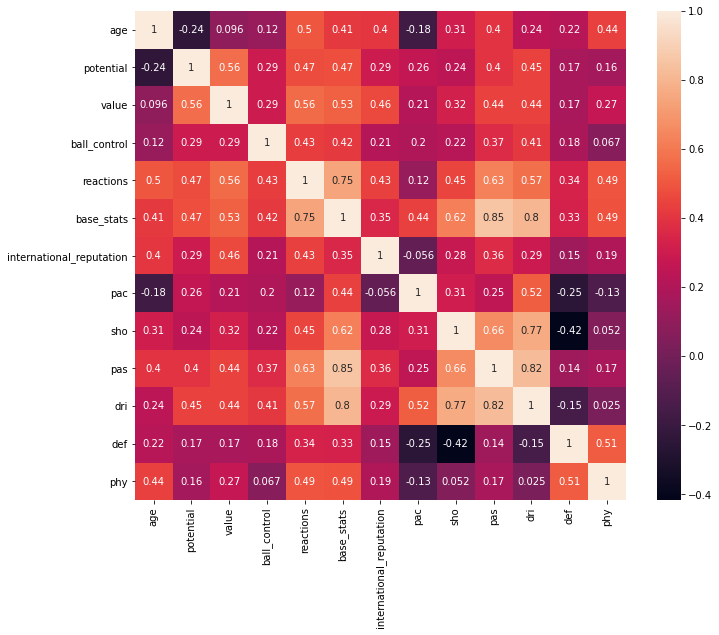

In [65]:
mask = np.zeros_like(dfLR2.corr())

mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=[11,9])
sns_plot = sns.heatmap(correlations_matrix, annot=True)
# save the figure
plt.savefig('mat_corr.png', dpi=100, bbox_inches='tight')
plt.show()

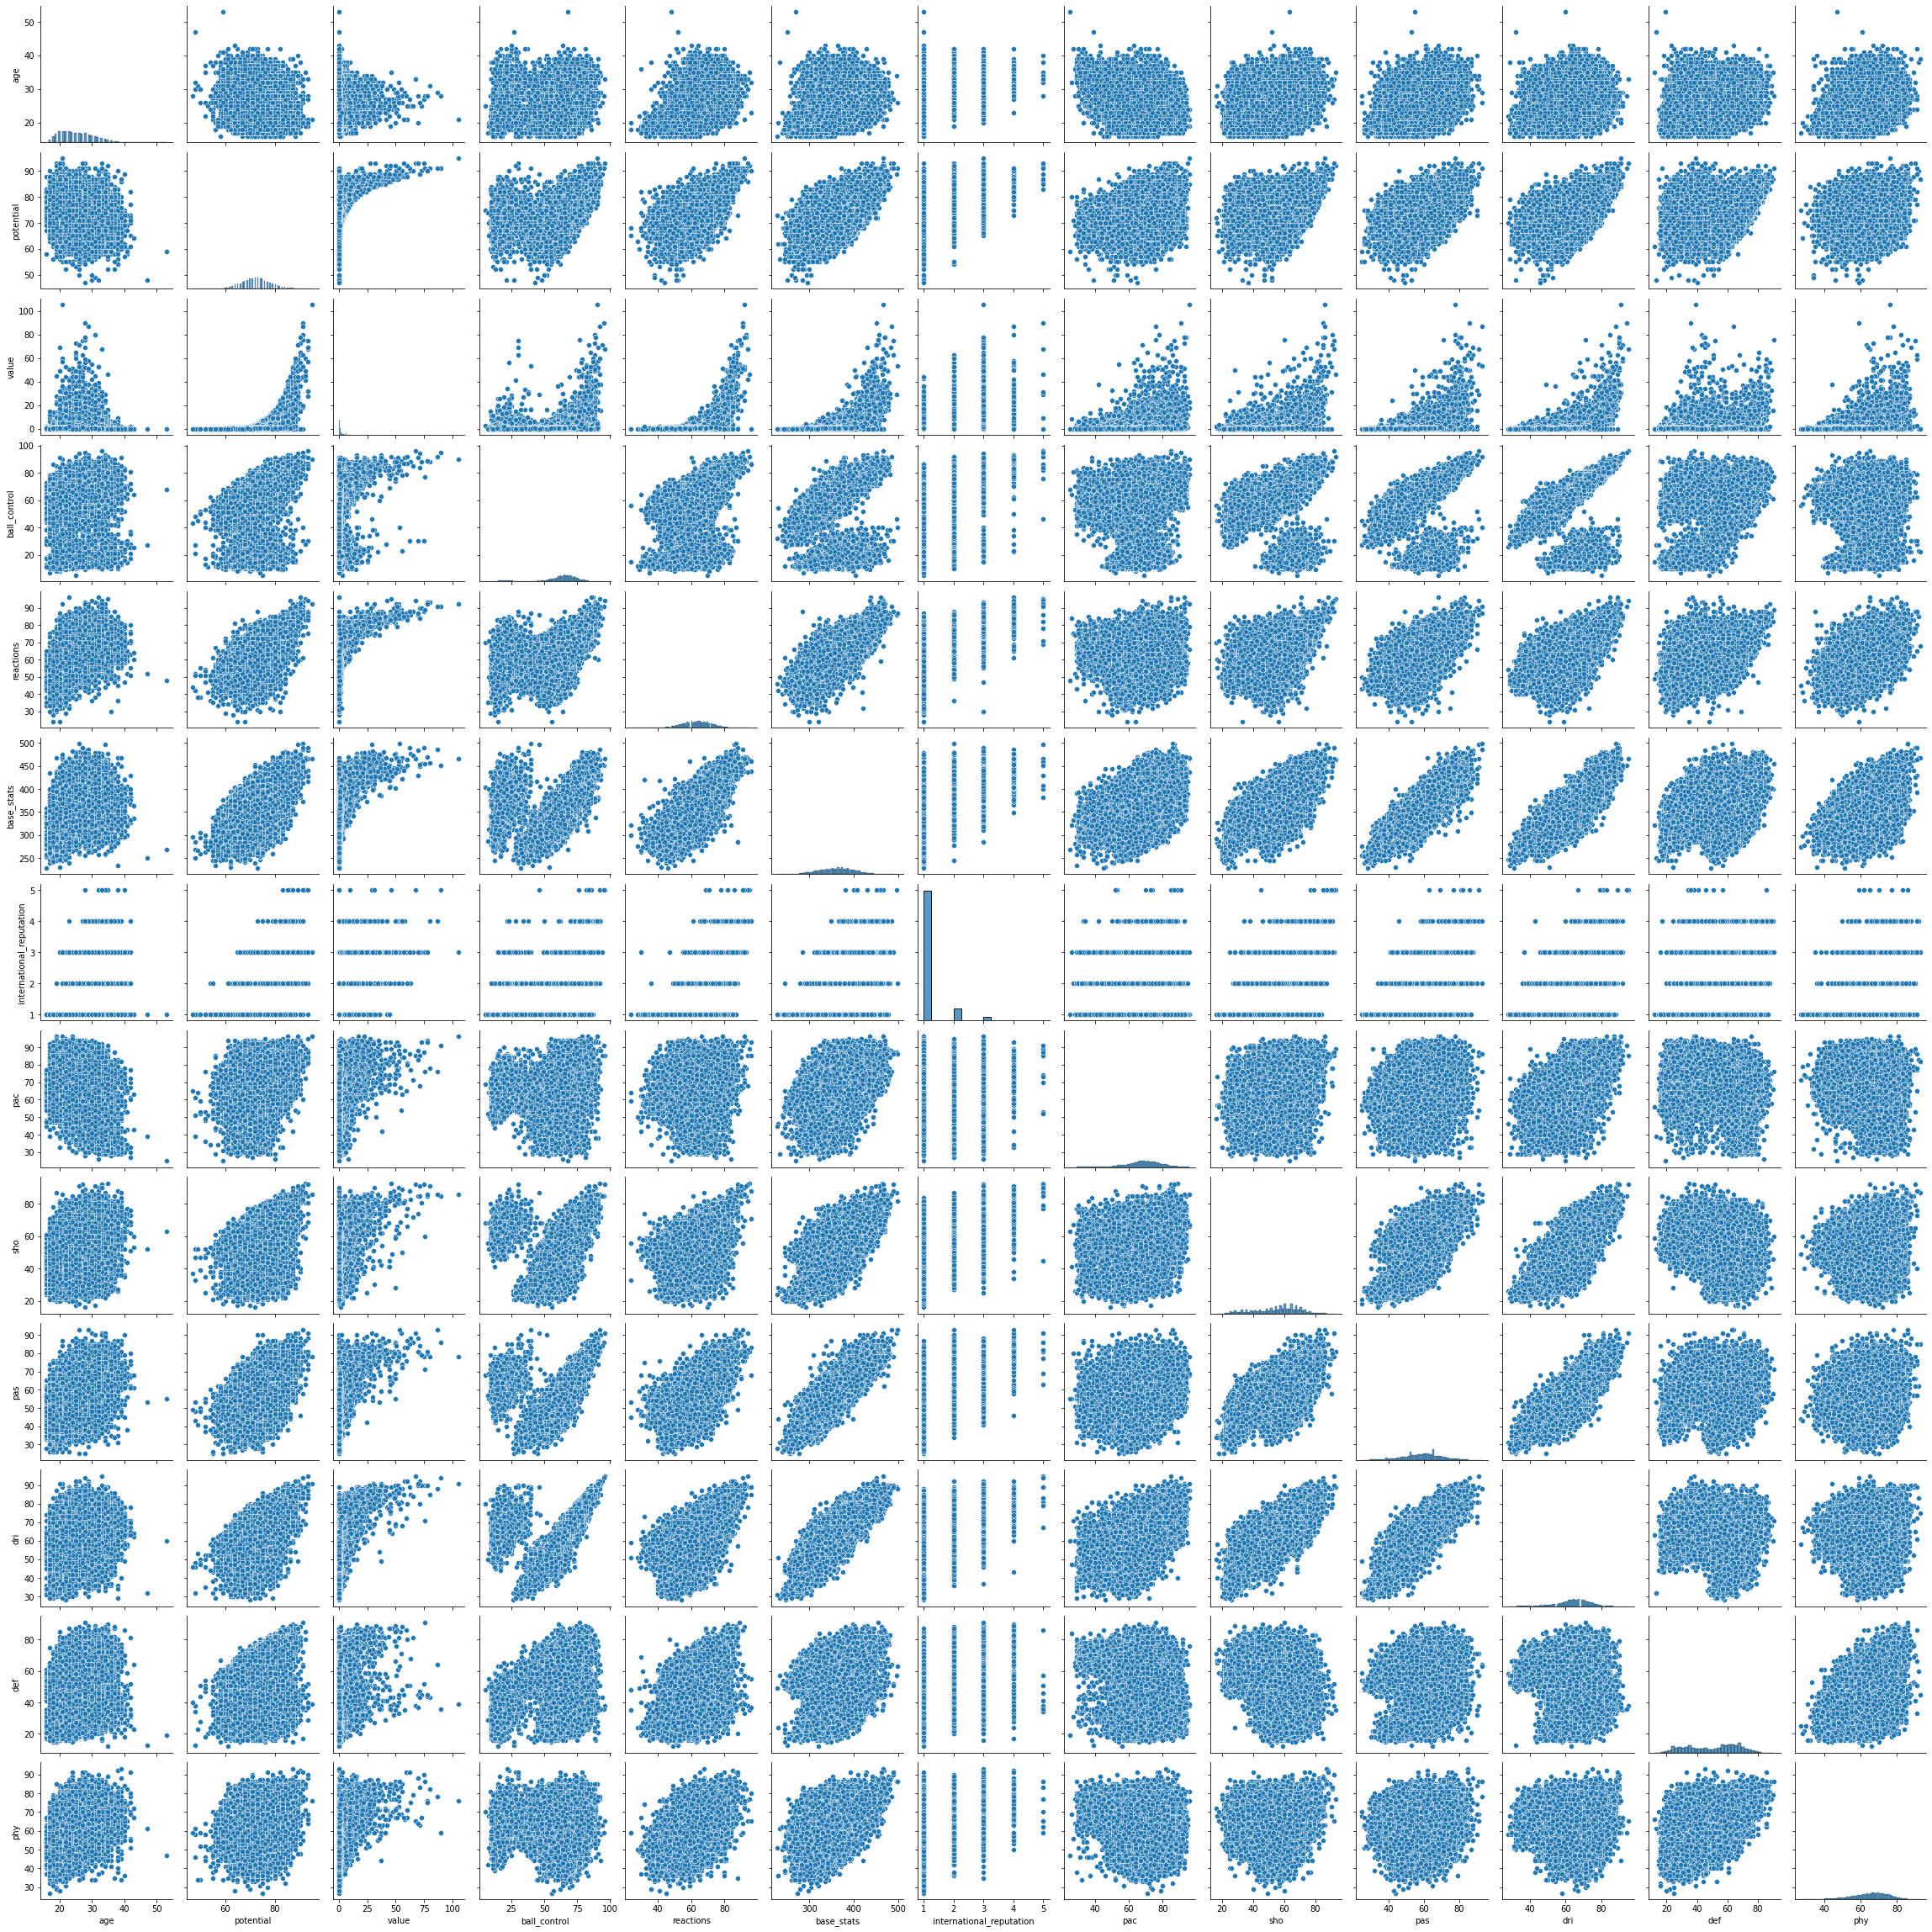

In [348]:
# covariance visualization
sns.pairplot(dfLR2)

# save the figure
plt.savefig('covariance_dfLR2.png', dpi=100, bbox_inches='tight')

plt.show()

## a. implementing the linear regression model to the dataframe without doing any preprocessing to have a benchmark on the metrics

In [91]:
# first, I copy the dataframe so that I can use it for improving my model i.e applying scaling methods on the datas.

dfLR3 = dfLR2.copy()

In [92]:
# splitting our data

X = dfLR2.drop('value', axis=1)
y = dfLR2['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
predictions = model.predict(X_test)

In [95]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.5065519041529165, 2.1088767065257206, 3.6778014355567996)

In [96]:
model.coef_

array([-2.30508157e-01,  1.83939444e-01, -2.23789050e-06,  1.85813394e-01,
        6.70407694e+10,  3.43611300e+00, -6.70407694e+10, -6.70407694e+10,
       -6.70407694e+10, -6.70407694e+10, -6.70407694e+10, -6.70407694e+10])

In [97]:
import math

results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true      pred     resid
ID                              
239018  1.00  2.041047  1.041047
244588  0.50  3.043000  2.543000
254756  0.92  3.929719  3.009719
230623  0.92  0.668000  0.252000
186148  3.60  8.793000  5.193000
...      ...       ...       ...
253581  0.90  0.554719  0.345281
210215  0.12 -1.925750  2.045750
234229  1.20  4.640656  3.440656
238936  0.85  2.156281  1.306281
217088  0.16 -5.288055  5.448055

[3425 rows x 3 columns]

In [98]:
results.describe()

true         pred        resid
count  3425.000000  3425.000000  3425.000000
mean      2.492531     2.448597     2.108877
std       5.236378     3.752089     3.013555
min       0.000000    -9.902313     0.000500
25%       0.350000    -0.013641     0.685438
50%       0.780000     2.019562     1.492219
75%       2.200000     4.285187     2.553156
max      78.000000    24.945344    58.117156

## b. linear regression with boxcox transformation

In [99]:
dfLR3.head()

age  potential  value  ball_control  reactions  base_stats  \
ID                                                               
2    33         69   0.62            71         69         408   
16   37         71   0.60            71         65         385   
27   33         71   1.10            78         59         354   
36   36         82   0.00            77         55         369   
41   36         81   5.50            90         75         420   

    international_reputation  pac  sho  pas  dri  def  phy  
ID                                                          
2                        2.0   71   59   70   71   68   69  
16                       1.0   53   69   73   69   58   63  
27                       2.0   45   68   76   77   36   52  
36                       1.0   61   66   66   69   47   60  
41                       4.0   58   70   85   85   63   59

In [100]:
def boxcox_transform(dfLR3):
    numeric_cols = dfLR3.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        dfLR3[column] = np.where(dfLR3[column]<=0, np.NAN, dfLR3[column]) 
        dfLR3[column] = dfLR3[column].fillna(dfLR3[column].mean())
        transformed_data, ci = stats.boxcox(dfLR3[column])
        dfLR3[column] = transformed_data
        _ci[column] = [ci] 
    return dfLR3, _ci

In [101]:
dfLR3, _ci = boxcox_transform(dfLR3)
dfLR3

age  potential     value  ball_control   reactions  base_stats  \
ID                                                                            
2       2.333615  13.172802 -0.486507  14162.192412  209.911868  596.439191   
16      2.380795  13.376923 -0.520506  14162.192412  193.813258  560.298652   
27      2.333615  13.376923  0.094978  17835.988029  170.278947  511.846827   
36      2.369619  14.448024  0.936513  17280.310143  155.019643  535.252888   
41      2.369619  14.353973  1.602573  25335.993051  234.641503  615.356882   
...          ...        ...       ...           ...         ...         ...   
259088  2.155150  13.172802 -0.611125   7912.383908  129.201530  431.305202   
259090  2.059924  12.860569 -2.200615   7237.102439  151.260901  457.528978   
259091  2.059924  12.965478 -2.200615   5148.249830  170.278947  432.844752   
259101  2.110516  13.577977 -0.754065   8263.475286  158.801086  482.306943   
259105  2.059924  13.677395 -1.188352   7570.283981  147.525141  420.539201   

        international_reputation          pac         sho         pas  \
ID                                                                      
2                       0.094765  2463.742155  453.868664  283.726599   
16                      0.000000  1375.061893  584.977081  301.077674   
27                      0.094765   992.112263  571.299910  318.724409   
36                      0.000000  1820.130636  544.317993  261.064613   
41                      0.094829  1645.953772  598.777474  373.371302   
...                          ...          ...         ...         ...   
259088                  0.000000  1427.299498  151.443339  114.974132   
259090                  0.000000  1880.129283  303.144517  212.146912   
259091                  0.000000  1941.097618  194.543759  147.015544   
259101                  0.000000  2463.742155  185.597137  217.435144   
259105                  0.000000  2395.019557  491.864041  133.005193   

                dri        def          phy  
ID                                           
2       4182.873266  75.923321  2907.224432  
16      3935.403734  64.221941  2411.757129  
27      4973.603546  38.771068  1626.147109  
36      3935.403734  51.439501  2181.787768  
41      6141.736449  70.063815  2107.755587  
...             ...        ...          ...  
259088  1813.764877  71.234349  2907.224432  
259090  2520.474283  46.818187  1824.716668  
259091  2151.709982  59.562112  1824.716668  
259101  2817.458611  65.388839  1757.223252  
259105  2617.517379  16.161376  1439.289713  

[17125 rows x 13 columns]

In [102]:
# splitting our data

X = dfLR3.drop('value', axis=1)
y = dfLR3['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [103]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Analyzing results

In [104]:
predictions = model.predict(X_test)

In [105]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8416724679731807, 0.3706223362187942, 0.5314970347124118)

In [106]:
model.coef_

array([ 1.89333953e+00,  9.77949201e-01,  3.90710886e-05,  8.76269569e-03,
       -1.65411352e-02, -3.07291245e+00,  5.74953310e-04,  2.55403880e-03,
        6.18521554e-03,  3.65667182e-04,  2.58319298e-02,  6.19829860e-04])

In [107]:
# MAE and MSE are log transformed
# have to inverse transform
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value'])

In [108]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(2.933524280569318, 10.539516060904548)

In [109]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true      pred     resid
ID                              
239018  1.00  0.871881  0.128119
244588  0.50  0.654683  0.154683
254756  0.92  0.863846  0.056154
230623  0.92  0.668212  0.251788
186148  3.60  2.246636  1.353364
...      ...       ...       ...
253581  0.90  0.758024  0.141976
210215  0.12  0.180498  0.060498
234229  1.20  2.315105  1.115105
238936  0.85  0.793035  0.056965
217088  0.16  0.255692  0.095692

[3425 rows x 3 columns]

In [112]:
results['pred'] = inv_boxcox(predictions, _ci['value']) ##make sure to invert the prediction too

In [113]:
results.describe()

true          pred        resid
count  3425.00000  3.315000e+03  3425.000000
mean      2.55493  4.739100e+24     1.230800
std       5.22200  2.728580e+26     7.043485
min       0.01000  1.023412e+00     0.000055
25%       0.40000  1.511474e+00     0.067755
50%       0.82000  2.334835e+00     0.200051
75%       2.60000  7.289865e+00     0.793355
max      78.00000  1.571008e+28   271.211873

In [114]:
Test_Set = pd.DataFrame(y_test).join(X_test).join(pd.DataFrame(df['name']))
Test_Set['value'] = np.exp(dfLR3['value'] )
Test_Set['predicted value'] = np.exp(predictions)
Test_Set = Test_Set.sort_values(by='predicted value',ascending=False)
Test_Set = Test_Set[['name','value','predicted value','age','potential','international_reputation']]
Test_Set

name      value  predicted value       age  potential  \
ID                                                                         
209331         M. Salah  41.668921    4.579200e+151  2.263464  15.179228   
192448    M. ter Stegen  38.303883     1.924115e+79  2.263464  15.444380   
167495         M. Neuer  19.767487     5.967879e+68  2.346056  15.089792   
201942  Roberto Firmino  30.897677     1.388546e+67  2.263464  14.909285   
177193       B. Ronhaar   2.551071     5.858657e+63  2.175607  15.179228   
...                 ...        ...              ...       ...        ...   
247223           Xia Ao   0.026512     1.043465e+00  2.133497  11.645059   
245558         G. Maley   2.551071     1.042572e+00  2.380795  11.291285   
247224     Wang Zhifeng   0.018348     1.032109e+00  2.175607  11.645059   
255617         M. Ezmat   0.026512     1.030453e+00  2.155150  11.645059   
222345      Zang Yifeng   0.026512     1.023392e+00  2.230870  11.049308   

        international_reputation  
ID                                
209331                  0.094828  
192448                  0.094828  
167495                  0.094829  
201942                  0.094828  
177193                  0.094829  
...                          ...  
247223                  0.000000  
245558                  0.000000  
247224                  0.000000  
255617                  0.000000  
222345                  0.000000  

[3425 rows x 6 columns]